### Autoencoder

|                          |                          | 
:-------------------------:|:-------------------------:
![](./images/autoencoder.jpg)  |  ![](./images/autoencoder_1.png)

In [47]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as K
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

Нейросеть автоэнкодера на самом деле является парой из двух соединенных нейросетей – энкодера и декодера. Энкодер принимает входные данные и преобразует их, делая представление более компактным и сжатым. В свою очередь, декодер использует преобразованные данные для трансформации их обратно в оригинальное состояние.

В случае, если вы незнакомы с энкодерами, но знаете о свёрточных нейронных сетях (Convolutional Neural Networks — CNNs), то, по сути, вы уже знаете, что делает автоэнкодер.

![](./images/encoder.jpg)

In [48]:
#model constants
hidden_dim = 2
batch_size = 100 # должно быть кратно 60 000

In [49]:
#Optimization for each layer

def dropout_and_batch(x):
  return Dropout(0.3)(BatchNormalization()(x))

In [58]:
#Create encoder
encoder =Sequential([Input((28, 28, 1))
,Flatten()
,Dense(128, activation='relu')
,Dense(64, activation='relu')
,Dense(2, activation='relu', name="encoder")])

In [59]:
# Create decoder
decoder =Sequential([
  Dense(64, activation='relu')
  ,Dense(28 * 28, activation='sigmoid')
  ,Reshape((28, 28, 1))])

In [52]:
# Define training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [60]:
input_img = Input((28, 28, 1))
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0869
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0542
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0518
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0506
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0496
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0487
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0475
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0468
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0461
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0456
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0452
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0446
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0443
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0438
Epoch 15/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


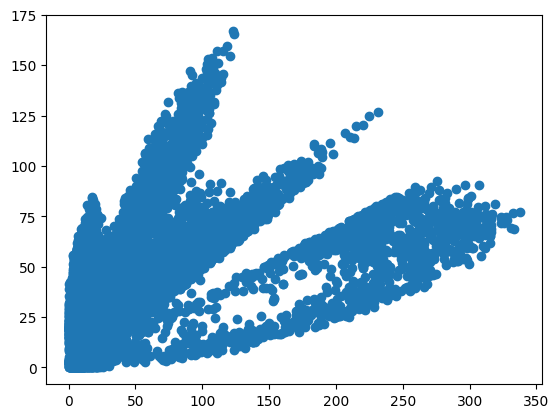

In [61]:
#encoder = autoencoder.get_layer("encoder")
h = encoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


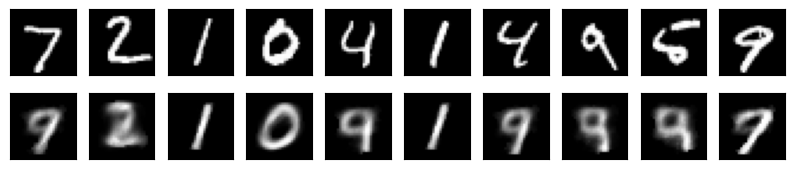

In [62]:
n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

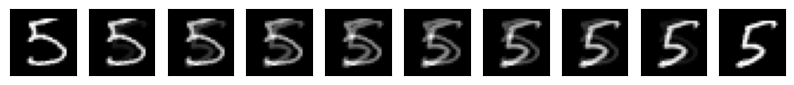

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


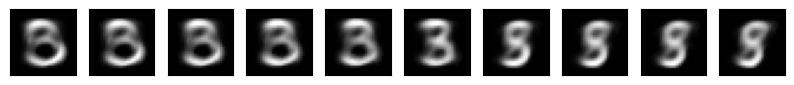

In [63]:
def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=10, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)


frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)